# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [17]:
df = pd.read_csv('/content/Dataset_clustering.csv')
df.tail()

,Temparature,Humidity,Moisture,Cluster,Soil Type
7085,36.43,71.29,30.73,3,Clayey
7086,39.39,71.67,49.34,1,Clayey
7087,35.79,67.64,45.04,2,Red
7088,37.78,73.38,36.03,1,Clayey
7089,31.38,48.73,62.27,0,Loamy


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7090 entries, 0 to 7089
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temparature  7090 non-null   float64
 1   Humidity     7090 non-null   float64
 2   Moisture     7090 non-null   float64
 3   Cluster      7090 non-null   int64  
 4   Soil Type    7090 non-null   object 
dtypes: float64(3), int64(1), object(1)
memory usage: 277.1+ KB


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [19]:
label_encoder = LabelEncoder()

categorical_columns = df.select_dtypes(include=['object']).columns
df[categorical_columns] = df[categorical_columns].apply(label_encoder.fit_transform)
df.head()

,Temparature,Humidity,Moisture,Cluster,Soil Type
0,26.0,52.0,38.0,4,3
1,29.0,52.0,45.0,0,1
2,34.0,65.0,62.0,1,0
3,32.0,62.0,34.0,2,2
4,28.0,54.0,46.0,3,0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7090 entries, 0 to 7089
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temparature  7090 non-null   float64
 1   Humidity     7090 non-null   float64
 2   Moisture     7090 non-null   float64
 3   Cluster      7090 non-null   int64  
 4   Soil Type    7090 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 277.1 KB


In [21]:
# Buat instance MinMaxScaler
scaler = MinMaxScaler()

# Normalisasi semua kolom numerik
numeric_columns = ['Temparature', 'Humidity', 'Moisture']
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Pisahkan fitur (X) dan target (y)
X = df.drop(columns=['Cluster'])
y = df['Cluster']

# Split data menjadi set pelatihan dan set uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tampilkan bentuk set pelatihan dan set uji untuk memastikan split
print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")

Training set shape: X_train=(5672, 4), y_train=(5672,)
Test set shape: X_test=(1418, 4), y_test=(1418,)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [22]:
# Definisikan setiap klasifikasi secara terpisah
knn = KNeighborsClassifier().fit(X_train, y_train)
dt = DecisionTreeClassifier().fit(X_train, y_train)
rf = RandomForestClassifier().fit(X_train, y_train)
svm = SVC().fit(X_train, y_train)
nb = GaussianNB().fit(X_train, y_train)

print("Model training selesai.")

Model training selesai.


Tulis narasi atau penjelasan algoritma yang Anda gunakan.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

KNN Accuracy: 0.79
Classification Report for KNN:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       278
           1       0.50      0.46      0.47       301
           2       1.00      1.00      1.00       294
           3       0.44      0.48      0.46       269
           4       1.00      1.00      1.00       276

    accuracy                           0.79      1418
   macro avg       0.79      0.79      0.79      1418
weighted avg       0.79      0.79      0.79      1418




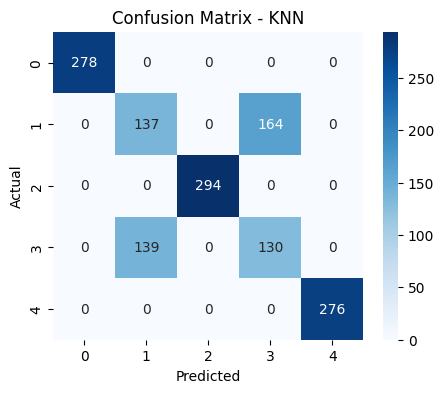

Decision Tree Accuracy: 0.79
Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       278
           1       0.50      0.44      0.47       301
           2       1.00      1.00      1.00       294
           3       0.45      0.51      0.48       269
           4       1.00      1.00      1.00       276

    accuracy                           0.79      1418
   macro avg       0.79      0.79      0.79      1418
weighted avg       0.79      0.79      0.79      1418




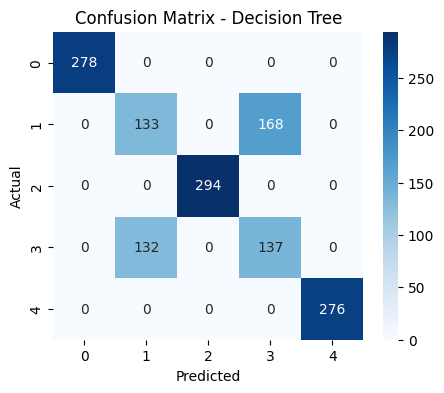

Random Forest Accuracy: 0.78
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       278
           1       0.49      0.47      0.48       301
           2       1.00      1.00      1.00       294
           3       0.43      0.45      0.44       269
           4       1.00      1.00      1.00       276

    accuracy                           0.78      1418
   macro avg       0.78      0.78      0.78      1418
weighted avg       0.78      0.78      0.78      1418




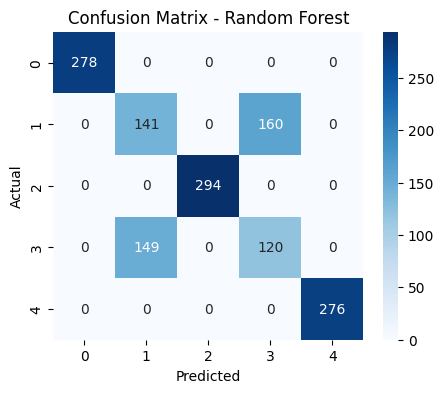

SVM Accuracy: 0.79
Classification Report for SVM:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       278
           1       0.00      0.00      0.00       301
           2       1.00      1.00      1.00       294
           3       0.47      1.00      0.64       269
           4       1.00      1.00      1.00       276

    accuracy                           0.79      1418
   macro avg       0.69      0.80      0.73      1418
weighted avg       0.69      0.79      0.72      1418




/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


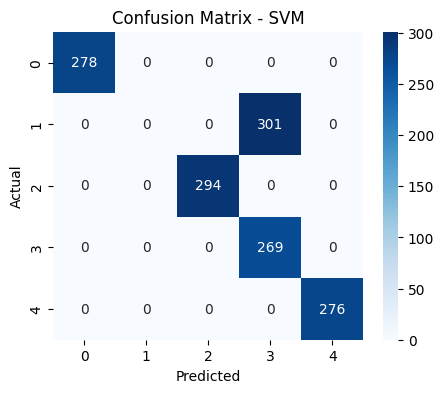

Naïve Bayes Accuracy: 0.79
Classification Report for Naïve Bayes:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       278
           1       0.50      0.18      0.27       301
           2       1.00      1.00      1.00       294
           3       0.46      0.79      0.59       269
           4       1.00      1.00      1.00       276

    accuracy                           0.79      1418
   macro avg       0.79      0.79      0.77      1418
weighted avg       0.79      0.79      0.77      1418




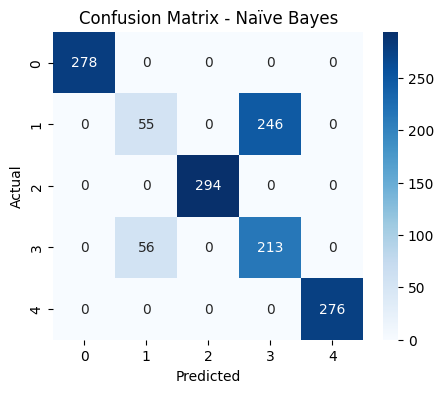

In [23]:
# Membuat daftar model untuk evaluasi
models = {
    "KNN": knn,
    "Decision Tree": dt,
    "Random Forest": rf,
    "SVM": svm,
    "Naïve Bayes": nb
}

# Evaluasi setiap model
for name, model in models.items():
    y_pred = model.predict(X_test)

    # Menghitung metrik evaluasi
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.2f}")
    print(f"Classification Report for {name}:\n{classification_report(y_test, y_pred)}\n")

    # Menampilkan Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=set(y_test), yticklabels=set(y_test))
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()


Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [24]:
#Type your code here

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [25]:
#Type your code here

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

Pada semua model yang digunakan didapati akurasi yang cukup tinggi, sebesar 79%. Namun pada cluster 1 dan 3 memiliki Precision, Recall, dan F1-Score yang rendah menandakan model belum bisa mengklasifikasikan dengan baik pada cluster ini. Kemudian pada cluster 0,2,4 ditemukan hasil klasifikasi yang baik terhadap semua model yang digunakan. Pada evaluasi model SVM dengan Confusion Matrix, ditemukan hanya pada cluster 1 yang mengalami kesalahan terhadap semua data.

Rekomendasi tindakan lanjutannya:
- mencoba menggunakan algoritma lain, atau menggunakan metode ensemble.

- melakukan feature engineering, cek apakah ada fitur tambahan yang bisa membantu membedakan data. Terkhusus pada cluster 1 dan 3


